FileNotFoundError: [Errno 2] No such file or directory: 'data/gaussian_mixture_spiral.png'

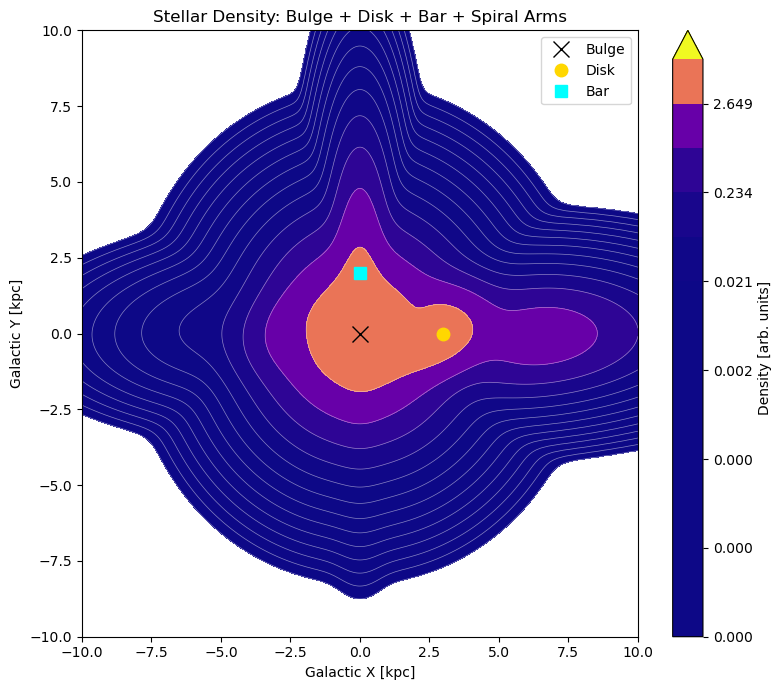

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian_2d(x, y, x0, y0, sigma_x, sigma_y, amp):
    return amp * np.exp(-((x - x0) ** 2 / (2 * sigma_x ** 2) +
                          (y - y0) ** 2 / (2 * sigma_y ** 2)))


def galaxy_density_2d(x, y,
                      bulge_params,
                      disk_params,
                      bar_params,
                      spiral_amp=0.3,
                      spiral_k=2,
                      spiral_pitch=np.deg2rad(15),
                      spiral_phase=0.0,
                      r0=1.0):
    bulge = gaussian_2d(x, y, *bulge_params)
    disk_base = gaussian_2d(x, y, *disk_params)
    bar = gaussian_2d(x, y, *bar_params)

    r = np.sqrt(x**2 + y**2) + 1e-6
    theta = np.arctan2(y, x)

    # Patrón de espiral logarítmica
    spiral_pattern = np.cos(
        spiral_k * (theta - np.log(r / r0) / np.tan(spiral_pitch)) + spiral_phase
    )

    # Modulación del disco para formar brazos
    disk_spiral = disk_base * (1.0 + spiral_amp * spiral_pattern)
    disk_spiral = np.clip(disk_spiral, 0, None)

    return bulge + disk_spiral + bar


# Grid
x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)
X, Y = np.meshgrid(x, y)

# (x0, y0, sigma_x, sigma_y, amp)
bulge_params = (0, 0, 1.5, 1.5, 5.0)
disk_params = (3, 0, 3.0, 0.8, 3.0)
bar_params = (0, 2, 0.5, 2.0, 2.0)

density = galaxy_density_2d(
    X, Y,
    bulge_params=bulge_params,
    disk_params=disk_params,
    bar_params=bar_params,
    spiral_amp=0.45,
    spiral_k=2,
    spiral_pitch=np.deg2rad(18),
    spiral_phase=0.5
)

# Evitar problemas numéricos para log
density = np.clip(density, 1e-6, None)

fig, ax = plt.subplots(figsize=(8, 7))
levels = np.logspace(np.log10(density.min()) + 0.1, np.log10(density.max()), 14)

cf = ax.contourf(X, Y, density, levels=levels, cmap="plasma", extend="max")
ax.contour(X, Y, density, levels=levels, colors="white", alpha=0.5, linewidths=0.5)

ax.set_xlabel("Galactic X [kpc]")
ax.set_ylabel("Galactic Y [kpc]")
ax.set_title("Stellar Density: Bulge + Disk + Bar + Spiral Arms")
plt.colorbar(cf, ax=ax, label="Density [arb. units]")

ax.plot([bulge_params[0]], [bulge_params[1]], "kx", ms=12, label="Bulge")
ax.plot([disk_params[0]], [disk_params[1]], "o", color="gold", ms=9, label="Disk")
ax.plot([bar_params[0]], [bar_params[1]], "s", color="cyan", ms=9, label="Bar")
ax.legend()

plt.tight_layout()
plt.savefig("data/gaussian_mixture_spiral.png", dpi=150, bbox_inches="tight")
plt.show()

